<a href="https://colab.research.google.com/github/Carinawuwu/Complete-Python-3-Bootcamp/blob/master/2024_869_JialingWu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMA/MMAB/MMAI 869 2024: Individual Assignment

Version 1: Updated June 9, 2023

<font color='red'>\# TODO: fill in the below</font>

- [Jialing Wu]
- [20434176]
- [MMA2024]
- [The Three Body Problem]
- [2023-12-10]

# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
print(datetime.datetime.now())

2023-12-09 00:55:38.320548


In [3]:
!which python

/usr/local/bin/python


In [4]:
!python --version

Python 3.10.12


In [5]:
!echo $PYTHONPATH

/env/python


In [6]:
pip install kmodes

In [7]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as sch
import seaborn as sns

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture


import itertools

import scipy

from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer

from kmodes.kmodes import KModes

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# This will ensure that matplotlib figures don't get cut off when saving with savefig()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Question 1: Uncle Steve's Diamonds

## 1.0: Load data

In [8]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [9]:
# Read the data
list(df1)
df1.shape
df1.describe().transpose()
df1.head(n=20)
df1.tail()

['Age', 'Income', 'SpendingScore', 'Savings']

(505, 4)

,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


,Age,Income,SpendingScore,Savings
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445
504,89,30267,0.289310,14386.351880


## Plot the Raw Data

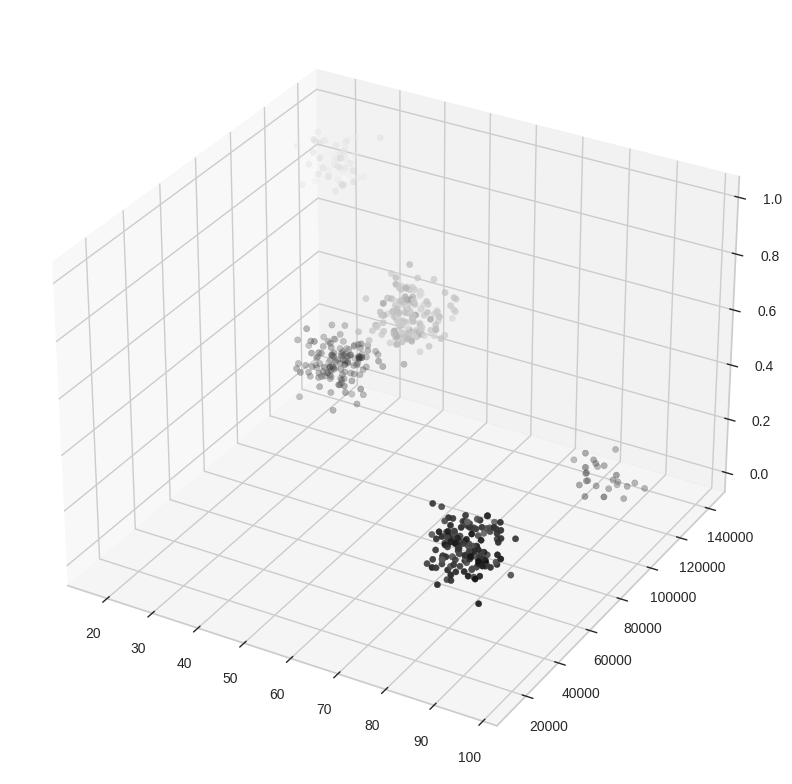

In [10]:
#Plot data for 4 features
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1['Age'], df1['Income'], df1['SpendingScore'], c=df1['Savings'])
plt.show()


## 1.1: Clustering Algorithm #1 K-Means

In [11]:
X = df1.copy()

In [12]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10, random_state=42)
k_means.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [13]:
k_means.labels_

array([2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0,
       2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2,
       2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2,
       2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2,
       0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 1, 2,
       1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0,
       1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1,
       2, 2, 0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2,
       2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1,
       2, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1,
       1, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 2,

Text(0.5, 0, 'Age')

Text(0.5, 0.5, 'Income')

Text(0.5, 0, 'Spending Score')

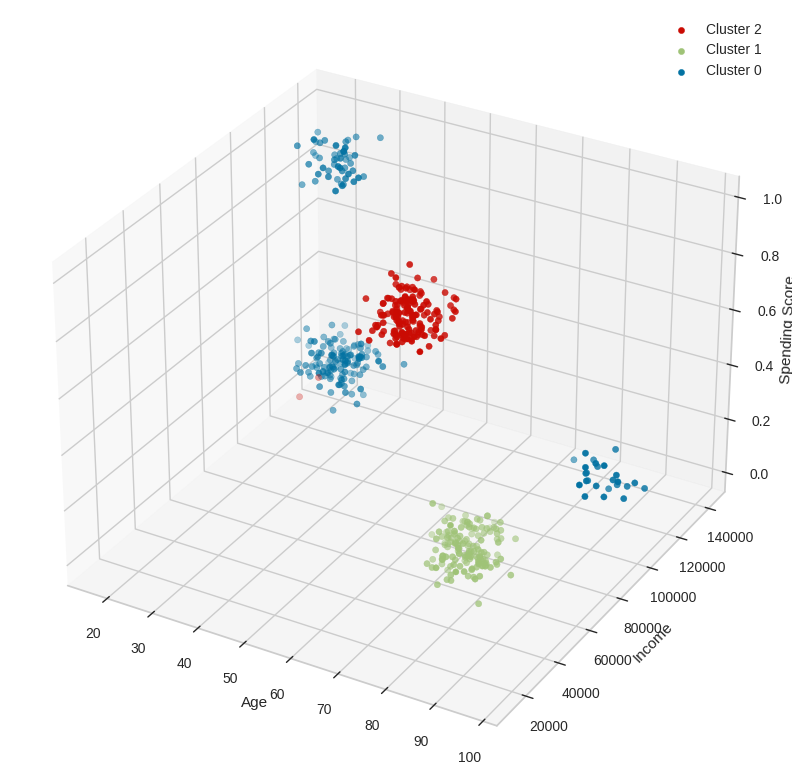

In [14]:
X['Cluster'] = k_means.fit_predict(X[['Age', 'Income', 'SpendingScore', 'Savings']])
# Plotting the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign different colors to different clusters
colors = ['r', 'g', 'b']
for cluster, color in zip(X['Cluster'].unique(), colors):
    cluster_data = X[X['Cluster'] == cluster]
    ax.scatter(cluster_data['Age'], cluster_data['Income'], cluster_data['SpendingScore'],
               c=color, label=f'Cluster {cluster}')

# Set labels
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending Score')

# Add a legend
ax.legend()

# Show the plot
plt.show()

## Internal Validation Metrics

In [15]:
# WCSS == Inertia
k_means.inertia_

43729705197.88847

In [16]:
silhouette_score(df1, k_means.labels_)

0.7393168523275075

Look at Individual Silhouette Scores

Text(0.5, 0, 'Age')

Text(0.5, 0.5, 'Income')

Text(0.5, 0, 'Spending Score')

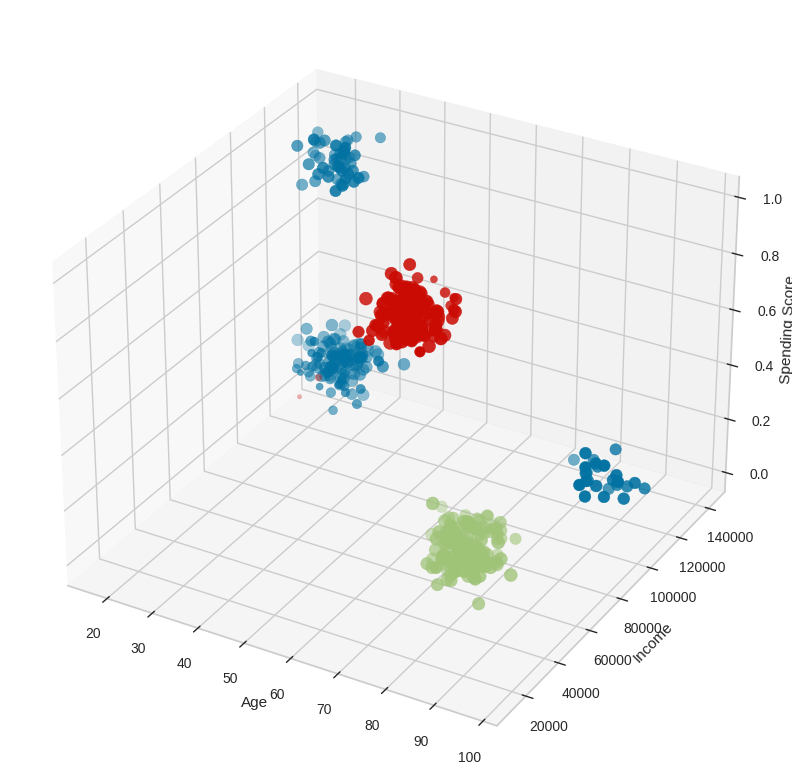

In [17]:
sample_silhouette_values = silhouette_samples(X, k_means.labels_)
sizes = 100*sample_silhouette_values

# Plotting the 3D scatter plot with silhouette sizes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign different colors to different clusters
colors = ['r', 'g', 'b']
for cluster, color in zip(X['Cluster'].unique(), colors):
    cluster_data = X[X['Cluster'] == cluster]
    ax.scatter(cluster_data['Age'], cluster_data['Income'], cluster_data['SpendingScore'],
               s=sizes[X['Cluster'] == cluster], c=color, label=f'Cluster {cluster}')

# Set labels
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending Score')

In [18]:
sample_silhouette_values = silhouette_samples(df1, k_means.labels_)

df1_tmp = df1.copy()
df1_tmp['Cluster ID'] = k_means.labels_

df1_tmp['Silhouette'] = sample_silhouette_values
df1_tmp = df1_tmp.sort_values(['Silhouette'])
df1_tmp.head()
df1_tmp.tail()

,Age,Income,SpendingScore,Savings,Cluster ID,Silhouette
400,33,92569,0.336080,13765.685996,0,0.010998
287,29,91375,0.235450,13104.962761,2,0.093519
463,28,94762,0.303596,15352.521937,0,0.206329
315,33,94964,0.330233,14018.349867,0,0.207206
236,38,94775,0.380390,16867.130820,0,0.216325


,Age,Income,SpendingScore,Savings,Cluster ID,Silhouette
448,87,26665,0.402146,17376.914743,1,0.883225
272,91,26424,0.319389,16501.468777,1,0.883554
464,86,27705,0.329377,17130.856102,1,0.883618
335,89,26940,0.326005,16555.159377,1,0.884253
375,84,27384,0.313647,16734.672754,1,0.884321


# Intepretting the Clusters

In [19]:
# Look at the centers
k_means.cluster_centers_

array([[3.73165829e+01, 1.12977769e+05, 4.27282030e-01, 1.22309820e+04],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [5.95974843e+01, 7.26749623e+04, 7.65433878e-01, 6.96643626e+03]])

In [20]:
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    X_tmp = X[k_means.labels_ == label].copy()
    X_tmp.loc['mean'] = X_tmp.mean()
    print(X_tmp.tail(13))


Cluster 0:
            Age         Income  SpendingScore       Savings  Cluster
463   28.000000   94762.000000       0.303596  15352.521937      0.0
466   18.000000  123718.000000       0.806553   4420.445821      0.0
468   32.000000  117050.000000       0.311356  14310.546207      0.0
471   31.000000  101209.000000       0.304323  16917.571691      0.0
476   33.000000  106757.000000       0.258396  14431.652799      0.0
477   33.000000  107100.000000       0.342435  14895.473479      0.0
482   32.000000  108417.000000       0.287371  16696.398659      0.0
487   26.000000  123005.000000       0.984526   4371.234733      0.0
496   22.000000  132948.000000       0.889800   2839.786357      0.0
498   30.000000   98030.000000       0.411112  16316.842905      0.0
499   25.000000  128625.000000       0.816739   4914.117127      0.0
500   28.000000  101206.000000       0.387441  14936.775389      0.0
mean  37.316583  112977.768844       0.427282  12230.981985      0.0

Cluster 1:
          

Hyperparameter Tuning

In [21]:
def do_kmeans(X, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(X)

    wcss = k_means.inertia_
    sil = silhouette_score(X, k_means.labels_)
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(2, 8):
    do_kmeans(X, k)

K=2, WCSS=187977458797.45, Sil=0.65
K=3, WCSS=43729705197.89, Sil=0.74
K=4, WCSS=21452909436.77, Sil=0.72
K=5, WCSS=17292847025.75, Sil=0.68
K=6, WCSS=13560301483.49, Sil=0.58
K=7, WCSS=9851065503.60, Sil=0.52


Based on the Silhouette Score and the decreasing trend of WCSS, K=3 seems to be a reasonable choice, as it provides both good cluster separation and a significant reduction in within-cluster sum of squares.

## 1.2: Clustering Algorithm #2 AgglomerativeClustering

In [22]:
agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [23]:
agg.labels_

array([2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0,
       2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2,
       2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2,
       2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2,
       0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 1, 2,
       1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0,
       1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1,
       2, 2, 0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2,
       2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1,
       2, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 2,

In [24]:
silhouette_score(X, agg.labels_)

0.7390672431235834

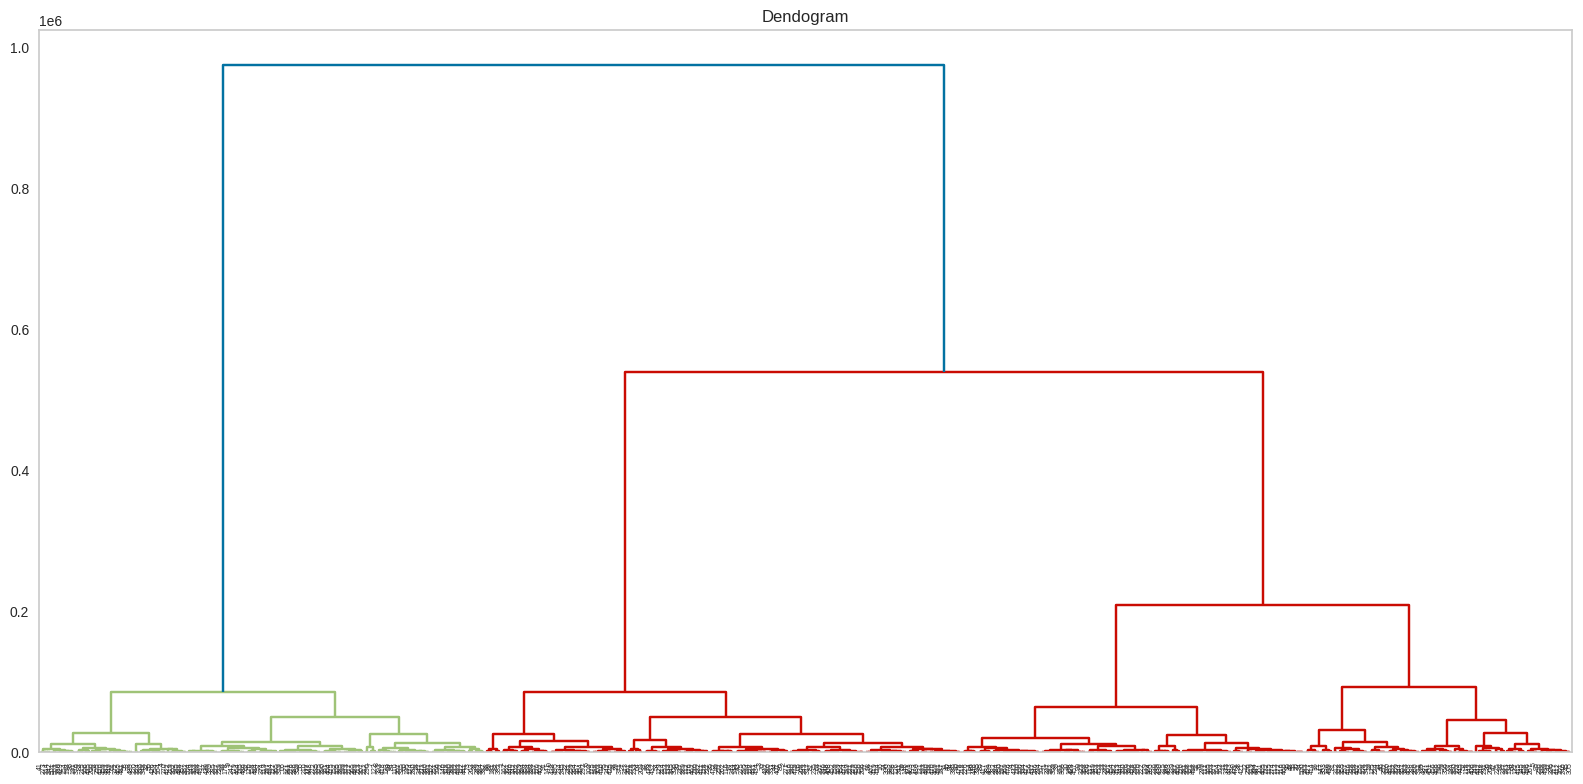

In [25]:
aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')
# Plot the dendogram
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Dendogram");
dend = scipy.cluster.hierarchy.dendrogram(aggl);

In [26]:
def do_agglomerative_clustering(X, k):
    agg = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    agg.fit(X)

    sil = silhouette_score(X, agg.labels_)
    print("K={}, Sil={:.2f}".format(k, sil))

for k in range(2, 8):
    do_agglomerative_clustering(X, k)

K=2, Sil=0.66
K=3, Sil=0.74
K=4, Sil=0.71
K=5, Sil=0.69
K=6, Sil=0.59
K=7, Sil=0.51


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

Distance Metrics

In [27]:
def plot_agg(X, linkage, metric):
    aggl = scipy.cluster.hierarchy.linkage(X, method=linkage, metric=metric)

    labels = scipy.cluster.hierarchy.fcluster(aggl, 3, criterion="maxclust")

    sil = 0
    n = len(set(labels))
    if n > 1:
        sil = silhouette_score(X , labels, metric=metric)
    print("Linkage={}, Metric={}, Clusters={}, Silhouette={:.3}".format(linkage, metric, n, sil))


linkages = ['complete', 'ward', 'single', 'centroid', 'average']
metrics = ['euclidean', 'minkowski', 'cityblock', 'cosine', 'correlation', 'chebyshev', 'canberra', 'mahalanobis']

for prod in list(itertools.product(linkages, metrics)):

    # Some combos are not allowed
    if (prod[0] in ['ward', 'centroid']) and prod[1] != 'euclidean':
        continue

    plot_agg(X, prod[0], prod[1])

Linkage=complete, Metric=euclidean, Clusters=3, Silhouette=0.726
Linkage=complete, Metric=minkowski, Clusters=3, Silhouette=0.726
Linkage=complete, Metric=cityblock, Clusters=3, Silhouette=0.737
Linkage=complete, Metric=cosine, Clusters=3, Silhouette=0.905
Linkage=complete, Metric=correlation, Clusters=3, Silhouette=0.908
Linkage=complete, Metric=chebyshev, Clusters=3, Silhouette=0.735
Linkage=complete, Metric=canberra, Clusters=3, Silhouette=0.587
Linkage=complete, Metric=mahalanobis, Clusters=3, Silhouette=0.147
Linkage=ward, Metric=euclidean, Clusters=3, Silhouette=0.739
Linkage=single, Metric=euclidean, Clusters=3, Silhouette=0.499
Linkage=single, Metric=minkowski, Clusters=3, Silhouette=0.499
Linkage=single, Metric=cityblock, Clusters=3, Silhouette=0.52
Linkage=single, Metric=cosine, Clusters=3, Silhouette=0.902
Linkage=single, Metric=correlation, Clusters=3, Silhouette=0.9
Linkage=single, Metric=chebyshev, Clusters=3, Silhouette=0.48
Linkage=single, Metric=canberra, Clusters=3, S

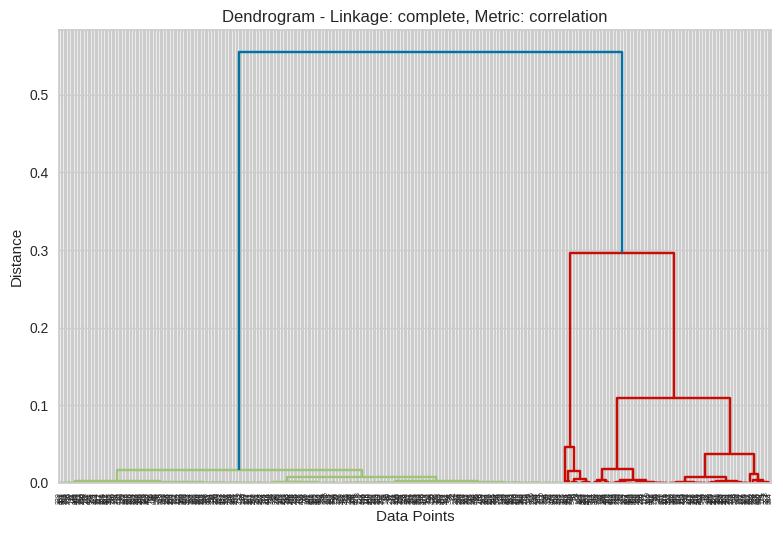

In [28]:
import scipy.cluster.hierarchy as sch

def plot_dendrogram(X, linkage, metric):
    aggl = sch.linkage(X, method=linkage, metric=metric)
    dendrogram = sch.dendrogram(aggl)

    plt.title(f"Dendrogram - Linkage: {linkage}, Metric: {metric}")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

# Example usage
linkage = 'complete'
metric = 'correlation'
plot_dendrogram(X, linkage, metric)

## 1.3 Model Comparison

To compare the two clustering models, first of all, we can examine the silhouette scores of the models. K-Means achieved a score of 0.74, while Agglomerative Clustering performed even better with a score of 0.908. Although K-Means yielded lower-quality results, it outperformed Agglomerative Clustering in terms of ease of use and processing speed. Additionally, considering the primary objective of identifying distinct customer personas, K-Means stands out for its simplicity in interpretation. In this case, I would recommend K-Means to Uncle Steve.

## 1.4 Personas

(0.0, 1.0, 0.0, 1.0)

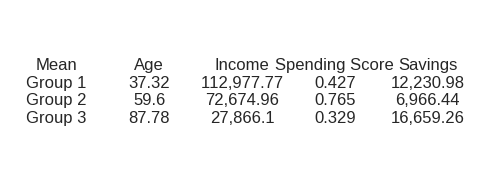

In [29]:
# Plot the table
table_data = [['Mean', 'Age', 'Income', 'Spending Score', 'Savings'],
              ['Group 1', '37.32', '112,977.77', '0.427', '12,230.98'],
              ['Group 2', '59.6', '72,674.96', '0.765', '6,966.44'],
              ['Group 3', '87.78', '27,866.1', '0.329', '16,659.26']]

fig, ax = plt.subplots(figsize=(5, 2))
table = ax.table(cellText=table_data, cellLoc='center', loc='center', edges='open')
table.auto_set_font_size(False)
table.set_fontsize(12)

# Remove axis
ax.axis('off')

# Display the table
plt.show()


**Group 1:**

**Description:** High-income young individuals.

**Key Traits:**

High income.

High savings.

Moderate spending in the store.

**Group 2:**

**Description:** Medium-income middle-aged individuals.

**Key Traits:**

Moderate income.

Low savings.

Willing to spend more in the store.

**Group 3:**

**Description:** Low-income elder individuals.

**Key Traits:**

Low income.

High savings.

Minimal spending in the store.


**Interpretation:**

**Group 1:** This group represents financially stable young individuals who are cautious spenders. They have both high income and high savings, indicating a strong financial position. Their moderate spending shows a balanced approach to consumption.

**Group 2:** Middle-aged individuals in this group have a moderate income and a lower savings rate. However, they are willing to spend more in the store. This could suggest that they prioritize current consumption and are less focused on saving for the future.

**Group 3:** Older individuals in this group have lower income, high savings, and minimal spending in the store. They exhibit a conservative spending behavior, potentially focusing on maintaining or growing their savings rather than immediate consumption.

# Question 2: Uncle Steve's Fine Foods

## 2.1: A rule that might have high support and high confidence.

{bread, milk} -> {eggs}

This rule indicates that customers who buy both bread and milk are highly likely to buy eggs as well. The high support indicates that this combination is common since french toast is a very popular choice for breakfest, and the high confidence indicates a strong association between {bread, milk} and {eggs}. Uncle Steve could placing these items close to each other in the store, it's more convenient for customers and it could potentially increase sales.

## 2.2: A rule that might have reasonably high support but low confidence.

{cake} -> {ice cream}

This rule shows that customers who buy cake may also buy ice cream, but with less certainty. While the support could be reasonably high (as people who have a sweet tooth would buy them together), the confidence might be lower, reflecting the occasional association. Uncle Steve might want to place them closer, but the lower confidence suggests it's not a strong pattern.

## 2.3: A rule that might have low support and low confidence.

{toothpaste} -> {greeting cards}

This rule indicates a weak association between buying toothpaste and purchasing greeting cards. Both items may not be frequently bought together, which result in low support and low confidence. This rule might not be particularly useful, as the association is not strong. It would provide insights such as placing toothpaste next to greeting cards won't be helpful for the store.

## 2.4: A rule that might have low support and high confidence.

{cake} -> {greeting cards}

This rule indicates a strong association between buying cake and greeting cards. The overall frequency of this combination is low, as not everyone celebrates events like birthdays every day at a local grocery store. The high confidence indicates a reliable pattern: people who come to the store to shop for birthdays typically purchase both cake and greeting cards. Uncle Steve could enhance their shopping experience by offering a birthday discount to customers buying this combo.

# Question 3: Uncle Steve's Credit Union

## 3.0: Load data and split

In [30]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


In [31]:
print(df3.head(10))

        UserID Sex  PreviousDefault  FirstName   LastName  NumberPets  \
0  218-84-8180   F                0      Debra   Schaefer           2   
1  395-49-9764   M                0      Derek     Wright           0   
2  892-81-4890   F                0    Shannon      Smith           0   
3  081-11-7963   F                0  Christina     Brooks           2   
4  347-03-9639   M                0      Ralph   Anderson           1   
5  827-53-3120   F                0   Adrienne  Zimmerman           0   
6  286-60-4093   F                0    Heather    Jenkins           0   
7  293-55-9106   M                0      Brent    Pearson           0   
8  610-09-3854   F                0     Cheryl   Robinson           2   
9  324-97-1189   F                0     Lauren   Williams           0   

   PreviousAccounts  ResidenceDuration                      Street  \
0                 3                  1             503 Linda Locks   
1                 1                  1       969 Cox Dam

In [32]:
# Convert 'DateOfBirth' from timedelta to numeric (days)
df3['DateOfBirth'] = pd.to_datetime(df3['DateOfBirth'])
df3['AgeInDays'] = (pd.to_datetime('today') - df3['DateOfBirth']).dt.days

#Remove features
df3 = df3.drop(['UserID', 'FirstName', 'LastName', 'Street','LicensePlate', 'DateOfBirth'], axis=1)

#Creat dummy variables
df3 = pd.get_dummies(data=df3, columns = ['Sex', 'City', 'Purpose'], drop_first=True)

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   PreviousDefault        6000 non-null   int64
 1   NumberPets             6000 non-null   int64
 2   PreviousAccounts       6000 non-null   int64
 3   ResidenceDuration      6000 non-null   int64
 4   BadCredit              6000 non-null   int64
 5   Amount                 6000 non-null   int64
 6   Married                6000 non-null   int64
 7   Duration               6000 non-null   int64
 8   AgeInDays              6000 non-null   int64
 9   Sex_M                  6000 non-null   uint8
 10  City_East Jessetown    6000 non-null   uint8
 11  City_East Jill         6000 non-null   uint8
 12  City_Ericmouth         6000 non-null   uint8
 13  City_Herrerafurt       6000 non-null   uint8
 14  City_Jacquelineland    6000 non-null   uint8
 15  City_Lake Chad         6000 non-null  

In [33]:
X = df3.drop(['BadCredit'], axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 3897 to 860
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   PreviousDefault        4800 non-null   int64
 1   NumberPets             4800 non-null   int64
 2   PreviousAccounts       4800 non-null   int64
 3   ResidenceDuration      4800 non-null   int64
 4   Amount                 4800 non-null   int64
 5   Married                4800 non-null   int64
 6   Duration               4800 non-null   int64
 7   AgeInDays              4800 non-null   int64
 8   Sex_M                  4800 non-null   uint8
 9   City_East Jessetown    4800 non-null   uint8
 10  City_East Jill         4800 non-null   uint8
 11  City_Ericmouth         4800 non-null   uint8
 12  City_Herrerafurt       4800 non-null   uint8
 13  City_Jacquelineland    4800 non-null   uint8
 14  City_Lake Chad         4800 non-null   uint8
 15  City_Lake Debra        4800 non-null

In [35]:
 print(X_train.head(10))

      PreviousDefault  NumberPets  PreviousAccounts  ResidenceDuration  \
3897                0           2                 0                  2   
5628                0           0                 2                  2   
1756                0           2                 0                  3   
2346                0           2                 1                  2   
2996                0           0                 1                  3   
1595                0           2                 2                  4   
5966                0           0                 0                  4   
3252                1           2                 1                  1   
829                 0           0                 1                  1   
5864                0           2                 2                  4   

      Amount  Married  Duration  AgeInDays  Sex_M  City_East Jessetown  ...  \
3897    3329        0        12      19589      1                    0  ...   
5628    2996        0      

## 3.1: Baseline model

In [36]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel

In [37]:
# Initialize LGBMClassifier
lgbm = LGBMClassifier(objective='binary', random_state=42)

# Define StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation
KFoldSplitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lgbm, X_train, y_train, cv=KFoldSplitter, scoring="roc_auc")

# Output the AUC scores
print(f"AUC scores for each fold are: {scores}")
print(f"Average AUC score: {np.mean(scores)}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 742, number of negative: 3578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 4320, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171759 -> initscore=-1.573210
[LightGBM] [Info] Start training from score -1.573210
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 742, number of negative: 3578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

For base model, the Average AUC score is 0.915596.


## 3.2: Adding feature engineering

In [38]:
df3['LoanToAgeRatio'] = df3['Amount'] / df3['AgeInDays']
df3['Default_Account_Interact'] = df3['PreviousDefault'] * df3['PreviousAccounts']
df3['DefaultRisk'] = df3['Amount'] * df3['PreviousDefault']
df3['DurationRatio'] = df3['ResidenceDuration'] / df3['Duration']
df3['MalePreDefault'] = df3['PreviousDefault'] * df3['Sex_M']
df3['AmountDurationRatio'] = df3['Amount'] * df3['Duration']
df3['MarriedwithPet'] = df3['Married'] * df3['NumberPets']
df3['EducationAmount'] = df3['Purpose_Education'] * df3['Amount']
df3['EducationPreDefault'] = df3['Purpose_Education'] * df3['PreviousDefault']
df3['HouseholdAmount'] = df3['Purpose_Household'] * df3['Amount']
df3['HouseholdPreDefault'] = df3['Purpose_Household'] * df3['PreviousDefault']
df3['NewCarAmount'] = df3['Purpose_NewCar'] * df3['Amount']
df3['NewCarPreDefault'] = df3['Purpose_NewCar'] * df3['PreviousDefault']
df3['OtherAmount'] = df3['Purpose_Other'] * df3['Amount']
df3['OtherPreDefault'] = df3['Purpose_Other'] * df3['PreviousDefault']
df3['RepairAmount'] = df3['Purpose_Repair'] * df3['Amount']
df3['RepairPreDefault'] = df3['Purpose_Repair'] * df3['PreviousDefault']
df3['UsedCarAmount'] = df3['Purpose_UsedCar'] * df3['Amount']
df3['UsedCarPreDefault'] = df3['Purpose_UsedCar'] * df3['PreviousDefault']
df3['VacationAmount'] = df3['Purpose_Vacation'] * df3['Amount']
df3['VacationPreDefault'] = df3['Purpose_Vacation'] * df3['PreviousDefault']

In [39]:
X = df3.drop(['BadCredit'], axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']



X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Apply LGBMClassifier
lgbm1 = LGBMClassifier(objective='binary', random_state=42)

# Define StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation
KFoldSplitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lgbm1, X_train0, y_train0, cv=KFoldSplitter, scoring="roc_auc")

# Output the AUC scores
print(f"AUC scores for each fold are: {scores}")
print(f"Average AUC score: {np.mean(scores)}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 742, number of negative: 3578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2341
[LightGBM] [Info] Number of data points in the train set: 4320, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171759 -> initscore=-1.573210
[LightGBM] [Info] Start training from score -1.573210
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 742, number of negative: 3578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise

Comparing to the base model, the average AUC score increased from 0.915596 to 0.917446.

## 3.3: Adding feature selection

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif
# SelectKBest with f_classif
k_best = SelectKBest(f_classif, k='all')  # Select all features
X_best = k_best.fit_transform(X, y)

# Get selected feature names
#selected_feature_names = X.columns[k_best.get_support()]

# Print selected feature names
#print("Selected Features:", selected_feature_names)

# Get feature scores and names
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': k_best.scores_,
})

# Sort features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Print or display the sorted feature scores
print("Feature Scores (Descending Order):")
print(feature_scores)

Feature Scores (Descending Order):
                     Feature        Score
35            LoanToAgeRatio  3730.762344
7                  AgeInDays  1734.194337
4                     Amount  1474.971541
40       AmountDurationRatio   224.459461
42           EducationAmount    35.259439
28         Purpose_Education    22.012768
6                   Duration    20.374142
46              NewCarAmount    12.219284
5                    Married    12.110359
38             DurationRatio    10.534641
23      City_Port Jesseville    10.490995
41            MarriedwithPet     8.837449
31             Purpose_Other     6.905871
25          City_Ramirezstad     4.237912
52             UsedCarAmount     4.104611
16         City_Lake Roberto     3.600536
0            PreviousDefault     2.998006
24           City_Port Keith     2.880919
14            City_Lake Chad     2.262661
37               DefaultRisk     1.931414
13       City_Jacquelineland     1.906019
45       HouseholdPreDefault     1.874526

In [42]:
# Update DataFrame with selected features
df3_selected = df3.drop(['ResidenceDuration','VacationPreDefault'], axis=1)

In [43]:
X = df3_selected.drop(['BadCredit'], axis=1) #.select_dtypes(['number'])
y = df3_selected['BadCredit']



X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Apply LGBMClassifier
lgbm2 = LGBMClassifier(objective='binary', random_state=42)

# Define StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation
KFoldSplitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lgbm2, X_train1, y_train1, cv=KFoldSplitter, scoring="roc_auc")

# Output the AUC scores
print(f"AUC scores for each fold are: {scores}")
print(f"Average AUC score: {np.mean(scores)}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 742, number of negative: 3578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2332
[LightGBM] [Info] Number of data points in the train set: 4320, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171759 -> initscore=-1.573210
[LightGBM] [Info] Start training from score -1.573210
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 742, number of negative: 3578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise

Comparing to the model with all features, by dropping the worst 2 features, the average AUC score dncreased from 0.917446 to 0.916390. Due to the feature scores are all positive, dropping the worst features didn't improve the model performance.

## 3.4: Adding hyperparameter tuning

In [45]:
pip install optuna

In [46]:
import optuna
import gc

In [47]:
# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to be tuned by Optuna
    param = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'verbosity': -1,
        'metric': 'auc',
        'random_state': 42,
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
        'min_split_gain': trial.suggest_loguniform('min_split_gain', 0.005, 0.1),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-9, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-9, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 20, 1000),
        'max_depth': trial.suggest_int('max_depth', 50, 200),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 200),
        'min_child_weight': trial.suggest_uniform('min_child_weight', 0.01, 0.1),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
    }

    # Initialize the LightGBM model with the suggested parameters
    lgbm_final = LGBMClassifier(**param)

    # Cross-validation
    KFoldSplitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(lgbm_final, X_train0, y_train0, cv=KFoldSplitter, scoring="roc_auc")

    # Return the average AUC score
    return np.mean(scores)


In [48]:
# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)  # You can change the number of trials

# Best hyperparameters
print('Best hyperparameters:', study.best_params)

# Retrain the model with the best hyperparameters
best_params = study.best_params
best_params.update({'objective': 'binary', 'random_state': 42})
best_model = LGBMClassifier(**best_params)

# Cross-validation with the best model
KFoldSplitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
best_scores = cross_val_score(best_model, X_train0, y_train0, cv=KFoldSplitter, scoring="roc_auc")

# Output the AUC scores of the best model
print(f"AUC scores for each fold with the best model are: {best_scores}")
print(f"Average AUC score with the best model: {np.mean(best_scores)}")


[I 2023-12-09 00:56:26,954] A new study created in memory with name: no-name-fc2a9cc3-21af-41dc-9a46-47be6778f9c1
<ipython-input-47-dcc8dd261d3a>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
<ipython-input-47-dcc8dd261d3a>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_split_gain': trial.suggest_loguniform('min_split_gain', 0.005, 0.1),
<ipython-input-47-dcc8dd261d3a>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

By adding hyperparameter tunning, the AUC score increased from 0.917446 to 0.927622

## 3.5: Performance estimation on testing data

In [49]:
# Best hyperparameters
print('Best hyperparameters:', study.best_params)

Best hyperparameters: {'n_estimators': 801, 'learning_rate': 0.006481053982852405, 'min_split_gain': 0.023659543959762382, 'reg_alpha': 1.6550149130570306, 'reg_lambda': 0.003055435185502006, 'num_leaves': 44, 'max_depth': 189, 'min_child_samples': 72, 'min_child_weight': 0.01694081955112052, 'subsample': 0.7566514225188683, 'colsample_bytree': 0.5091370382283047}


In [50]:
custom_hyperparameters = {
    'boosting_type': 'gbdt',
    'verbosity': 0,
    'random_state': 42,
    'n_estimators': 656,
    'learning_rate': 0.006038423861230069,
    'min_split_gain': 0.046208326220046426,
    'reg_alpha': 0.12043837980089056,
    'reg_lambda': 2.934316963844129,
    'num_leaves': 753,
    'max_depth': 155,
    'min_child_samples': 138,
    'min_child_weight': 0.04250977770123438,
    'subsample': 0.7091718283185053,
    'colsample_bytree': 0.5601894456785419,
}


custom_model = LGBMClassifier(**custom_hyperparameters)

In [51]:
# Fit the model on the entire training data
custom_model.fit(X_train0, y_train0)

# Predict on the test set
y_pred = custom_model.predict(X_test0)

# Evaluate the model on the test set
test_roc_auc = roc_auc_score(y_test0, y_pred)
print(f'Test ROC AUC: {test_roc_auc}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

LGBMClassifier(colsample_bytree=0.5601894456785419,
               learning_rate=0.006038423861230069, max_depth=155,
               min_child_samples=138, min_child_weight=0.04250977770123438,
               min_split_gain=0.046208326220046426, n_estimators=656,
               num_leaves=753, random_state=42, reg_alpha=0.12043837980089056,
               reg_lambda=2.934316963844129, subsample=0.7091718283185053,
               verbosity=0)

Test ROC AUC: 0.7637589984501663


For the test dataset, the ROC is 0.763254.

# Question 4: Uncle Steve's Wind Farm

(0.0, 1.0, 0.0, 1.0)

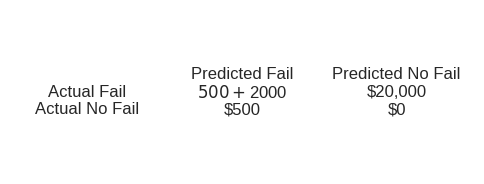

In [52]:
# Plot the table
table_data = [['', 'Predicted Fail', 'Predicted No Fail'],
              ['Actual Fail', '$500 + $2000', '$20,000'],
              ['Actual No Fail', '$500', '$0']]

fig, ax = plt.subplots(figsize=(5, 2))
table = ax.table(cellText=table_data, cellLoc='center', loc='center', edges='open')
table.auto_set_font_size(False)
table.set_fontsize(12)

# Remove axis
ax.axis('off')

# Display the table
plt.show()


To calculate the cost using each model, we will start by creating a cost matrix. If Uncle Steve predicts a failure and it indeed occurs, he will need to pay an inspection cost of 500 dollars and a service fee of 2,000 dollars. On the other hand, if the wind turbine does not fail as predicted, only the $500 inspection fee will be incurred.

If predicted not to fail, Uncle Steve will not bother with inspection. However, if the wind turbine actually fails, the cost to repair will be $20,000. The most ideal situation would be predicting no failure, and actually, no failure occurs. No fee will be incurred for this situation.

So, for the random forest model, the cost is calculated as 201 * (500 + 2000) + 55 * 20,000 + 50 * 500 = $1,627,500.

For the RNN, the cost is calculated as 226 * (500 + 2000) + 30 * 20,000 + 1200 * 500 = $1,765,000.

By comparing the cost of using two different models to predict, the random forest incurs less cost. In this case, the model with better precision works well.